# Final Project Machine Learning


## Member
### Trương Gia Bảo - 521H0201
### Vi Thành Đạt - 521H0390

## Import Library

In [39]:
!pip install pandas scikit-learn matplotlib seaborn numpy -q

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Infomation

In [41]:
data = pd.read_csv("googleplaystore.csv")
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [42]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [43]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# Data Preprocessing

In [44]:
# Removing irrelevant features
# data = data.drop(['App','Last Updated','Current Ver','Android Ver'],axis='columns')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [45]:
data=data.drop(data.index[data[~data.Reviews.str.isnumeric()].index])

In [46]:
data['Reviews'] = data['Reviews'].astype(int)  # Convert 'Reviews' column to integer type

data['Size'] = data['Size'].apply(lambda x: str(x).
                                            replace('M', '').
                                            replace('k', ''))  # Remove 'k' , 'M' from 'Size' column

data['Price'] = data['Price'].apply(lambda x: float(str(x).
                                                    replace('$', ''))) # Remove 'k' from 'Size' column

data['Installs'] = data['Installs'].apply(lambda x: int(str(x).
                                                        replace('+', '').
                                                        replace(',','')))  # Remove '+' from 'Installs' column


data['Size'] = pd.to_numeric(data['Size'], errors='coerce')
# Calculate the mean excluding NaN values
mean_size = data['Size'].mean(skipna=True)

# Replace "Varies with device" with the mean value
data['Size'].fillna( mean_size, inplace=True)

data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.00000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.00000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.70000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.00000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.80000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.00000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.60000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.50000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,37.03544,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [47]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

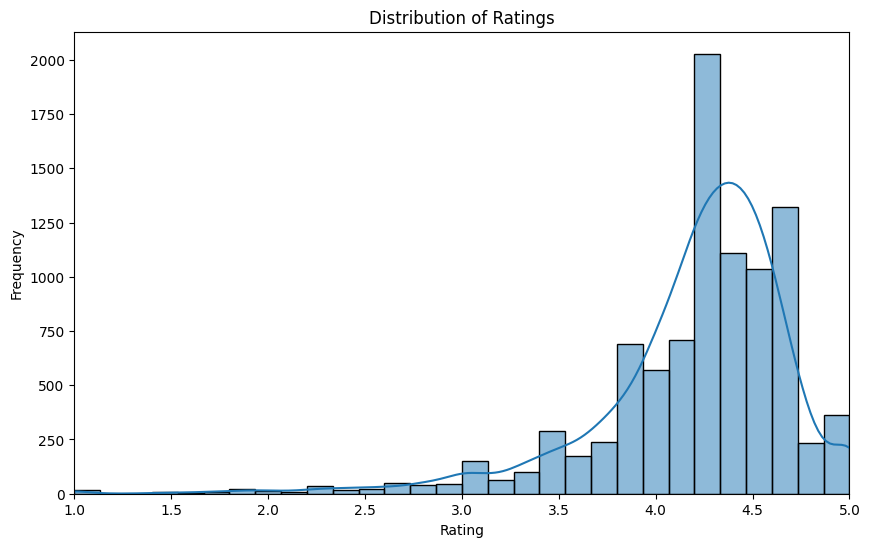

In [48]:
# Plot histogram for Rating
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.xlim((1,5))
plt.ylabel('Frequency')
plt.show()

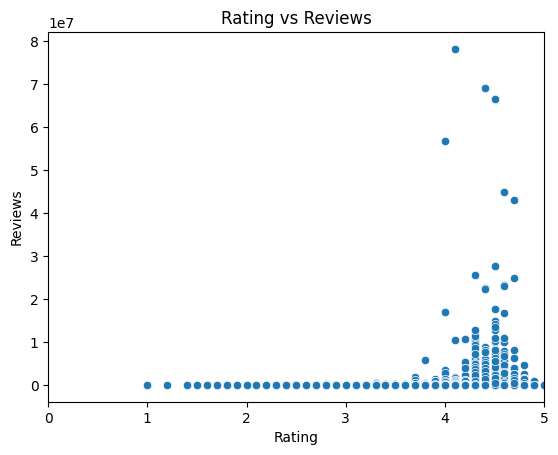

In [49]:
# Scatter plot for Rating vs Reviews
sns.scatterplot(x='Rating', y='Reviews', data=data)
plt.title('Rating vs Reviews')
plt.xlim((0,5))
plt.show()

In [50]:
# # Loop through columns
# for col in data.columns:
#     if data[col].dtype != 'object':
#         continue  # Skip non-categorical columns

#     # Create subplots
#     fig, ax = plt.subplots(figsize=(16,9))

#     data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
#     ax.set_title(f'Distribution of Apps by {col}')
#     ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()

In [51]:
# # Loop through columns
# for col in data.columns:
#     if data[col].dtype != 'object':
#         continue  # Skip non-categorical columns
#     plt.figure(figsize=(16, 9))
#     category_counts = data[col].value_counts()
#     plt.bar(category_counts.index, category_counts.values)
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.title(f'Distribution of {col}')
#     plt.xticks(rotation=90)
#     plt.show()

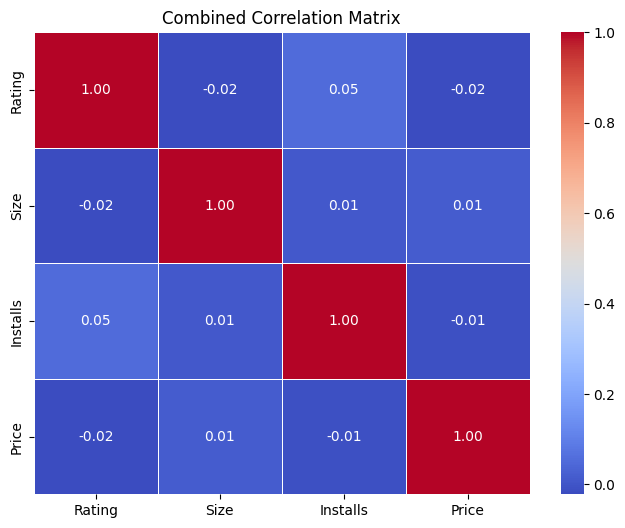

In [52]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
numeric_correlation_matrix = data[numeric_columns].corr()
# Combine both correlation matrices
combined_correlation_matrix = numeric_correlation_matrix.copy()

# Create a heatmap using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(combined_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Combined Correlation Matrix')
plt.show()

In [53]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [54]:
data.duplicated().sum()

483

In [55]:
# checking for null values
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [56]:
data.shape

(10840, 13)

In [57]:
# Handling missing values
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
data['Type'].fillna('Free', inplace=True)

# Preprocessing Type column
data['Type'] = data['Type'].apply(lambda x: 1 if x == 'Paid' else 0)

In [58]:
# drop duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [59]:
# checking for null values
data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [60]:
data['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01, 3.70354401e+01, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 2.01000000e+02, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

In [61]:
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

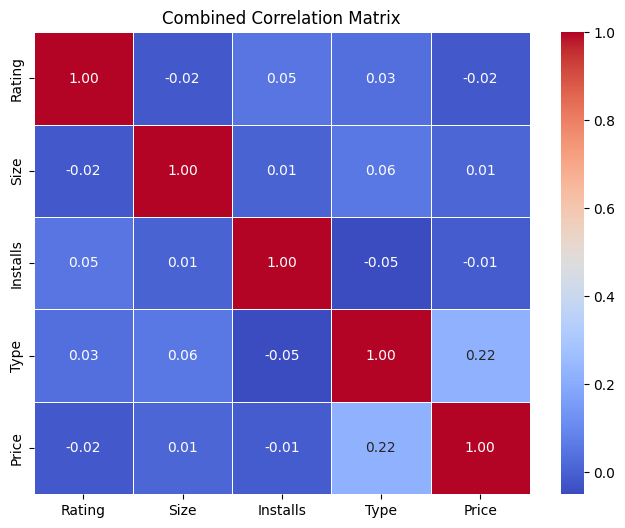

In [62]:
# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric columns
numeric_correlation_matrix = data[numeric_columns].corr()
# Combine both correlation matrices
combined_correlation_matrix = numeric_correlation_matrix.copy()

# Create a heatmap using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(combined_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Combined Correlation Matrix')
plt.show()

In [63]:
data.to_csv('out.csv',index=False)

# Model Machine Learning

In [64]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [65]:
X = data.drop(columns=['Rating'])
y = data['Rating']

# Perform label encoding if there are categorical features
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X.loc[:, col] = label_encoder.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [66]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [67]:
linear_reg_pred = linear_reg.predict(X_test_scaled)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
print("Linear Regression MAE:", linear_reg_mae)
print("Linear Regression MSE:", linear_reg_mse)

Linear Regression MAE: 0.31998678253792406
Linear Regression MSE: 0.24224845010057244


# KNN

In [68]:
# K-Nearest Neighbors
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [69]:
knn_reg_pred = knn_reg.predict(X_test_scaled)
knn_reg_mae = mean_absolute_error(y_test, knn_reg_pred)
knn_reg_mse = mean_squared_error(y_test, knn_reg_pred)
print("KNN Regression MAE:", knn_reg_mae)
print("KNN Regression MSE:", knn_reg_mse)

KNN Regression MAE: 0.35404351523666067
KNN Regression MSE: 0.2739234302641933


# Decision Tree

In [70]:
# Decision Tree
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [71]:
dt_reg_pred = dt_reg.predict(X_test_scaled)
dt_reg_mae = mean_absolute_error(y_test, dt_reg_pred)
dt_reg_mse = mean_squared_error(y_test, dt_reg_pred)
print("Decision Tree Regression MAE:", dt_reg_mae)
print("Decision Tree Regression MSE:", dt_reg_mse)

Decision Tree Regression MAE: 0.39553094780513154
Decision Tree Regression MSE: 0.4214206338068139


# Random Forest

In [72]:
# Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [73]:
rf_reg_pred = rf_reg.predict(X_test_scaled)
rf_reg_mae = mean_absolute_error(y_test, rf_reg_pred)
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)
print("Random Forest Regression MAE:", rf_reg_mae)
print("Random Forest Regression MSE:", rf_reg_mse)

Random Forest Regression MAE: 0.29430051222403913
Random Forest Regression MSE: 0.21059128712761974


# Gradient Boosting

In [74]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

# Feed Forward Neural Network

In [75]:
# Predict the target variable for the test set
gb_reg_pred = gb_reg.predict(X_test_scaled)

# Evaluate the model
gb_reg_mae = mean_absolute_error(y_test, gb_reg_pred)
gb_reg_mse = mean_squared_error(y_test, gb_reg_pred)

print("Gradient Boosting Regression MAE:", gb_reg_mae)
print("Gradient Boosting Regression MSE:", gb_reg_mse)

Gradient Boosting Regression MAE: 0.3001344726917024
Gradient Boosting Regression MSE: 0.21500109472755552


In [76]:
import tensorflow as tf
from tensorflow import keras

# Xây dựng mô hình
model_ffnn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(1)
])

# Biên dịch mô hình
model_ffnn.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history_ffnn = model_ffnn.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Đánh giá mô hình trên dữ liệu kiểm tra
mse_ffnn = model_ffnn.evaluate(X_test_scaled, y_test)

ModuleNotFoundError: No module named 'tensorflow'

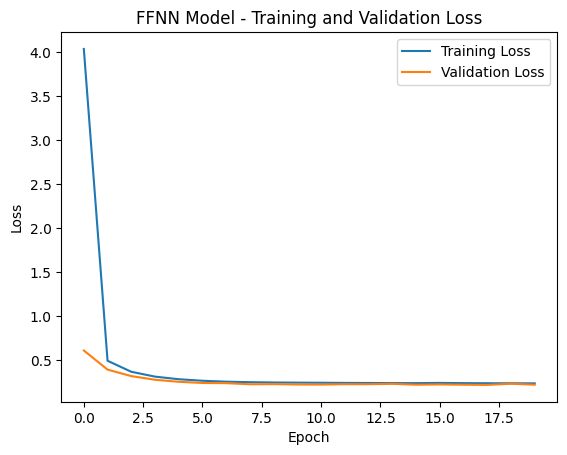

In [ ]:
# Plot training and validation loss
plt.plot(history_ffnn.history['loss'], label='Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.title('FFNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Reccurent Neural Network 

In [ ]:
# Chuyển đổi dữ liệu thành dạng chuỗi thời gian
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Xây dựng mô hình
model_rnn = keras.Sequential([
    keras.layers.SimpleRNN(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    keras.layers.Dense(1)
])

# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs= 20, batch_size=32, validation_split=0.2)

# Đánh giá mô hình trên dữ liệu kiểm tra
mse_rnn = model_rnn.evaluate(X_test_rnn, y_test)

Epoch 1/20
206/206 [==============================] - 2s 3ms/step - loss: 7.0109 - val_loss: 0.9174
Epoch 2/20
206/206 [==============================] - 0s 2ms/step - loss: 0.6576 - val_loss: 0.4969
Epoch 3/20
206/206 [==============================] - 0s 2ms/step - loss: 0.4444 - val_loss: 0.3764
Epoch 4/20
206/206 [==============================] - 0s 2ms/step - loss: 0.3572 - val_loss: 0.3162
Epoch 5/20
206/206 [==============================] - 0s 2ms/step - loss: 0.3129 - val_loss: 0.2851
Epoch 6/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2892 - val_loss: 0.2636
Epoch 7/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2738 - val_loss: 0.2512
Epoch 8/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2643 - val_loss: 0.2397
Epoch 9/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2567 - val_loss: 0.2346
Epoch 10/20
206/206 [==============================] - 0s 2ms/step - loss: 0.2519 - val_loss: 0.2284

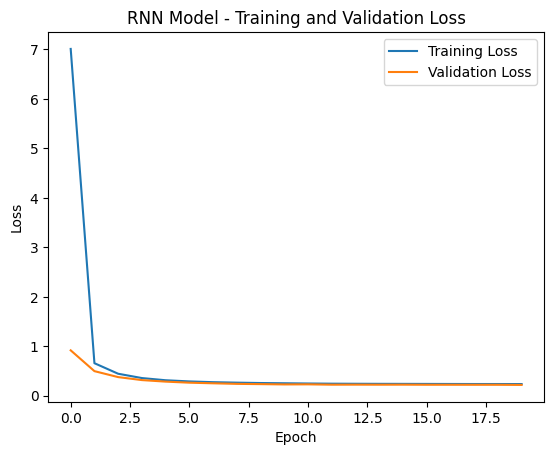

In [ ]:
# Plot training and validation loss
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()